In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_1 = nn.Sequential(
            nn.Linear(2,8),
            nn.Linear(8,1),
            nn.Linear(1,1)
)
for p in model_1.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [ ]:
torch.manual_seed(44)
model_2 = nn.Sequential(
            nn.Linear(2,8),
            nn.Linear(8,1),
            nn.Linear(1,1)
)
for p in model_2.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [ ]:
torch.manual_seed(49)
model_3 = nn.Sequential(
            nn.Linear(2,8),
            nn.Linear(8,1),
            nn.Linear(1,1)
)
for p in model_3.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [ ]:
torch.manual_seed(44)
model_4 = nn.Sequential(
            nn.Linear(2,8),
            nn.Linear(8,1),
            nn.Linear(1,1)
)
for p in model_4.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [ ]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1616, -0.4611],
                      [ 0.5122, -0.1869],
                      [-0.3595,  0.0562],
                      [-0.1330,  0.1856],
                      [ 0.1013,  0.2232],
                      [ 0.0942, -0.7089],
                      [ 0.2673,  0.0928],
                      [-0.7546,  0.5951]])),
             ('0.bias',
              tensor([ 0.0495,  0.2993,  0.4213, -0.3133,  0.5582,  0.2395,  0.5586, -0.0737])),
             ('1.weight',
              tensor([[-0.1979,  0.1735, -0.0979,  1.1533,  0.2610,  0.1396,  0.1968,  0.1672]])),
             ('1.bias', tensor([-0.0016])),
             ('2.weight', tensor([[-0.1821]])),
             ('2.bias', tensor([0.4940]))])

In [ ]:
model_4.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1616, -0.4611],
                      [ 0.5122, -0.1869],
                      [-0.3595,  0.0562],
                      [-0.1330,  0.1856],
                      [ 0.1013,  0.2232],
                      [ 0.0942, -0.7089],
                      [ 0.2673,  0.0928],
                      [-0.7546,  0.5951]])),
             ('0.bias',
              tensor([ 0.0495,  0.2993,  0.4213, -0.3133,  0.5582,  0.2395,  0.5586, -0.0737])),
             ('1.weight',
              tensor([[-0.1979,  0.1735, -0.0979,  1.1533,  0.2610,  0.1396,  0.1968,  0.1672]])),
             ('1.bias', tensor([-0.0016])),
             ('2.weight', tensor([[-0.1821]])),
             ('2.bias', tensor([0.4940]))])

In [ ]:
w_ns = np.array([])
w_1a = np.array([])
w_2 = np.array([])
w_1b = np.array([])

for i in range(3):

    w_ns = np.append(w_ns, model_1[i].weight.view(-1).detach().numpy())
    w_1a = np.append(w_1a, model_2[i].weight.view(-1).detach().numpy())
    w_2 = np.append(w_2, model_3[i].weight.view(-1).detach().numpy())
    w_1b = np.append(w_1b, model_4[i].weight.view(-1).detach().numpy())

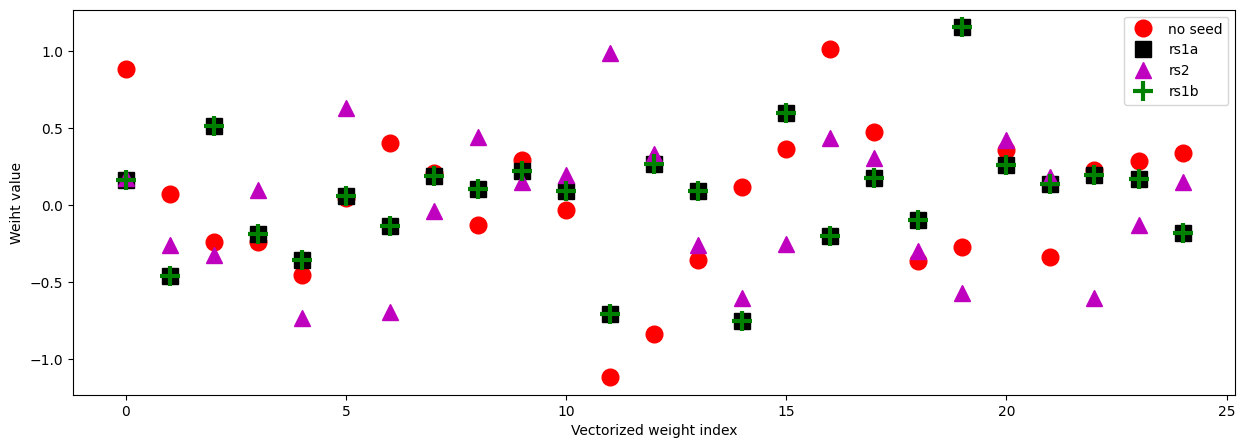

In [ ]:
fig = plt.figure(figsize = (15, 5))

plt.plot(w_ns, 'ro', markersize = 12, label = 'no seed')
plt.plot(w_1a, 'ks', markersize = 12, label = 'rs1a')
plt.plot(w_2, 'm^', markersize = 12, label = 'rs2')
plt.plot(w_1b, 'g+', markersize = 15, label = 'rs1b', markeredgewidth = 3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weiht value')

plt.show()

In [ ]:
# algebraic test
print('1a - 1b should be zeros: ')
print(w_1a - w_1b)
print('\n\n')

print('1a - 2 should be non-zeros: ')
print(w_1a - w_2)
print('\n\n')

print('1a - no_seed should be non-zeros: ')
print(w_1a - w_ns)
print('\n\n')

1a - 1b should be zeros: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a - 2 should be non-zeros: 
[-0.01223445 -0.2046608   0.83691218 -0.28576487  0.37623748 -0.57550284
  0.56292678  0.22580178 -0.33780196  0.07236499 -0.10063417 -1.69468158
 -0.06529576  0.35126952 -0.14922863  0.84484546 -0.63316898 -0.13298734
  0.1991259   1.726327   -0.16377378 -0.04303037  0.80168237  0.2994893
 -0.3310554 ]



1a - no_seed should be non-zeros: 
[-0.72066703 -0.53389992  0.75333181  0.05230588  0.09547278  0.00859326
 -0.53661092 -0.0190668   0.23129921 -0.0721208   0.1236968   0.40793175
  1.10579881  0.45167241 -0.8692895   0.22945529 -1.20960535 -0.3008569
  0.26577796  1.42246723 -0.09801525  0.47423896 -0.02999218 -0.11764735
 -0.52266328]



